In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Neural Network Classification with TensorFlow

A classification is where you try to classify something as one thing or another.
A few types of classification problems:
 * Binary Classification
 * Multiclass Classification
 * Multilabel Classificaiton

## Creating data to view and fit

In [5]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                   noise = 0.03,
                   random_state=42)



In [6]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [7]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [8]:
## Visualizing the data
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


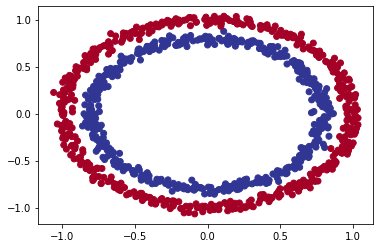

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [10]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [11]:
# View of features and Label
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in Modelling

1. Create/Import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [12]:
import tensorflow as tf
tf.__version__

'2.6.4'

In [13]:
#Set the Random seed
tf.random.set_seed(42)

# 1. Create the model
m1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the Model
m1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
          optimizer=tf.keras.optimizers.SGD(),
          metrics=["accuracy"])

# 3. Fit the model
m1.fit(X, y, epochs=5)


Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4830


In [14]:
# Trying to improve the m1 model's accuracy, as now it's only 48% accurate

m1.fit(X, y, epochs=200, verbose=0)

In [15]:
m1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since, our model is performing close to 50% accuracy, we are now going to tweak the model

## Experiment 2

In [16]:
# set the seed
tf.random.set_seed(42)

# 1. Create a model
m2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
m2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
          optimizer=tf.keras.optimizers.SGD(),
          metrics=["accuracy"])

m2.fit(X, y, epochs=300, verbose=0)

In [17]:
m2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6956 - accuracy: 0.5000


[0.6955971121788025, 0.5]

## Improving the model
Even we increased the layers and training, m2 is performing equivalent to m1, hence we need to improve the model
There are many ways to improve a deep learning model
Naming a few
1. Adding layers
2. Increase number of hidden units
3. Change the activation functions (Softmax, relu)
4. Change the Optimization functions (Adam/SGD)
5. Change the learning rate at Optimizers
6. Fitting on more data
7. Fitting for longer

## Experiment 3

In [18]:
# set the random seed
tf.random.set_seed(42)

# 1. Create a model
m3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
m3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
          optimizer=tf.keras.optimizers.Adam(),
          metrics=["accuracy"])

m3.fit(X, y, epochs=100, verbose=0)

In [19]:
m3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

### To visualize our model's precition, and create a decision boundary
1. Take a trained model with features(X) and preds(y)
2. Create a meshgrid of the different values of X.
3. Make predictions across the meshgrid
4. Plot the preds

In [20]:
import numpy as np

In [21]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    https://cs231n.github.io/neural-networks-case-study/
    
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:,1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                         np.linspace(y_min, y_max, 100))
    
    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    
    # Making predictions
    y_pred = model.predict(x_in)
    
    # Checking for multiclass-classification
    if len(y_pred[0]) > 1 :
        print("Doing Multiclass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else :
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    

Doing binary classification


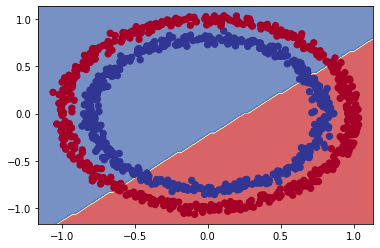

In [22]:
#Viewing the predictions our m3 model is making

plot_decision_boundary(model = m3, X = X, y = y)

In [23]:
# It can be observed that the plot seems to be working for the regression problem....

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)# y = X+100

# Splitting our data into train and test sets
X_regression_train = X_regression[:150]
X_regression_test = X_regression[150:]
y_regression_train = y_regression[:150]
y_regression_test  = y_regression[150:]

# Fit our model with the regression data
#m3.fit(tf.expand_dims(X_regression_train, axis=-1), y_regression_train, epochs=100)

As the m3 model is compiler with Binaryclassentropy, but we are trying to fit it with regression problem

In [24]:
#  Hence reproducing the plot dimensions for the regression problem we created using the new data

#setup the random seed
tf.random.set_seed(42)

# 1. Create the model
m4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
m4.compile(loss = tf.keras.losses.mae,
          optimizer= tf.keras.optimizers.Adam(),
          metrics=["mae"])

m4.fit(tf.expand_dims(X_regression_train, axis=-1), y_regression_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

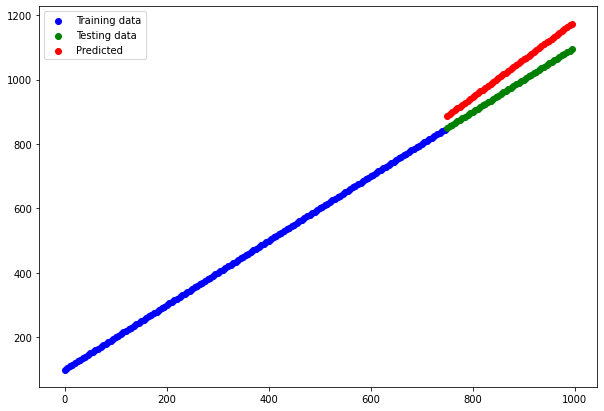

In [25]:
# Evaluating the m4 model's predictions
y_regression_pred = m4.predict(X_regression_test)


# Plotting the figure based on the predictions
plt.figure(figsize=(10,7))
plt.scatter(X_regression_train, y_regression_train, c="b", label="Training data")
plt.scatter(X_regression_test, y_regression_test, c="g", label="Testing data")
plt.scatter(X_regression_test, y_regression_pred, c="r", label="Predicted")
plt.legend()

In [26]:
## Non-Linearity

In [27]:
# Reproducing the linearly seperable boundary for non-linear data

#setting the random seed
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=5)

# 1.Create a Model
m5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
])

# 2. Compile the model
m5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
          optimizer = tf.keras.optimizers.Adam(lr=0.001),
          metrics=["accuracy"])

history = m5.fit(X, y , epochs = 500, callbacks=[callback])

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/500
32/32 [==============================] - 1s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/500
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/500
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/500
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/500
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/500
32/32 [==============================] - 0s 1ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/500
32/32 [==============================] - 0s 1ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/500
32/32 [==============================] - 0s 1ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/500
32/32 [==============================] - 0s 1ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/500
32/32 [==============================] - 0s 1ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

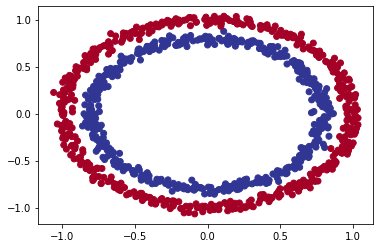

In [28]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

Doing binary classification


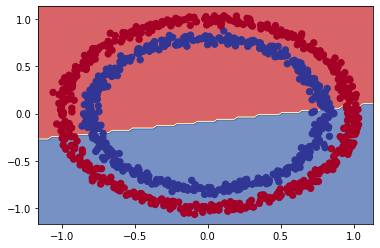

In [29]:
plot_decision_boundary(model = m5,
                       X=X,
                       y=y)

## Build NN with Non-linear activation function

In [30]:
#set the random seed
tf.random.set_seed(42)

# 1.Create a model
m6 = tf.keras.Sequential([
        tf.keras.layers.Dense(1, activation="relu")
])

# 2. Compile the model
m6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
          optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
          metrics=["accuracy"])


# 3. fit the model
m6.fit(X, y, epochs=200)


Epoch 1/200
32/32 [==============================] - 1s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

### Observations on Non-linear activation function
* Increased training time with relu as an activation function is making a non-linear decision boundary
* Increasing Number of hidden units in the model accordingly is also improving the accuracy of the model.
* Keypoint:
    1. For Binary Classification we use the **Sigmoid** activation function in last layer.
    2. For Multiclass Classification we use the **SoftMax** activation function in the last layer.

In [31]:
## Replicating the model with the experiment done in Tensorflow playground, which helped in increasing the accuracy of the model

#Set the Random seed
tf.random.set_seed(42)

# 1. Create a model
m7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
])

# 2. Compile the model
m7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
          optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
          metrics=["accuracy"])

# Fit the model
h7= m7.fit(X, y , epochs = 700, verbose=0)

In [32]:
m7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.1594 - accuracy: 0.9850


[0.1594492346048355, 0.9850000143051147]

Doing binary classification


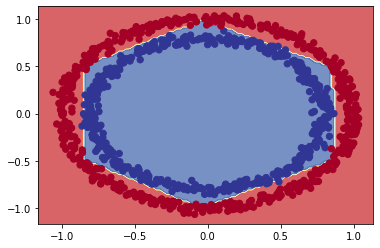

In [33]:
plot_decision_boundary(model= m7,
                      X = X,
                    y = y)

* The combination of linear and non-linear functions is one of the key fundamentals of neural networks

## Evaluating and Improving the classification
* using the Train, Validation and Test datasets for our model

In [34]:
X_train, y_train, X_test, y_test = X[:800], y[:800], X[800:], y[800:]

X_train, y_train, X_test, y_test

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.64889467, -0.51222194],
        [-0.18878747,  0.74504113],
        [-0.27333143, -0.70507331]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [35]:
m7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [36]:
## Creating our model on these Train and test data
callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience = 3)

## Set the random seed
tf.random.set_seed(42)


## 1. Create a model
m8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, tf.keras.activations.relu),
    tf.keras.layers.Dense(1, tf.keras.activations.sigmoid)
])

## Optimizer = How it should improve based on the learning rate
## loss - How wrong the predicts are

m8.compile(loss = tf.keras.losses.BinaryCrossentropy(),
          optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
          metrics = ["accuracy"])

h8 = m8.fit(X_train, y_train, epochs = 500, verbose=0, callbacks = [callback])

In [37]:
m8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0971 - accuracy: 0.9800


[0.0971204861998558, 0.9800000190734863]

Doing binary classification
Doing binary classification


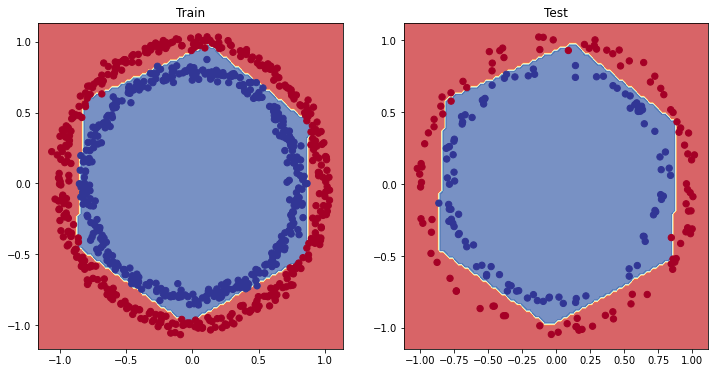

In [38]:
# Plot the decision boundaries for the training and test data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model = m8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model = m8, X=X_test, y=y_test)
plt.show()

Text(0.5, 1.0, 'Model_8 loss curve')

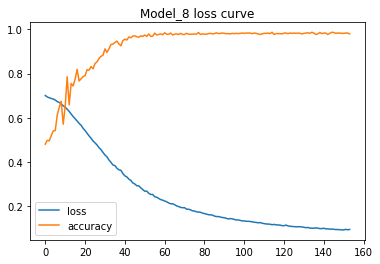

In [39]:
pd.DataFrame(h8.history).plot()
plt.title("Model_8 loss curve")

## Finding the best learning rate
* adaptively changing the learning rate while training the model using callbacks

In [40]:
## set the random seed

tf.random.set_seed(42)

## 1. Create the model
m9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, tf.keras.activations.relu),
    tf.keras.layers.Dense(1, tf.keras.activations.sigmoid)
])

m9.compile(loss = tf.keras.losses.BinaryCrossentropy(),
          optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
          metrics = ["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4*10**(epoch/20))
callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=3)

h9 = m9.fit(X_train, y_train, verbose=0, epochs=400, callbacks=[callback, lr_scheduler])

In [41]:
len(h8.history)

2

<AxesSubplot:xlabel='epochs', ylabel='loss'>

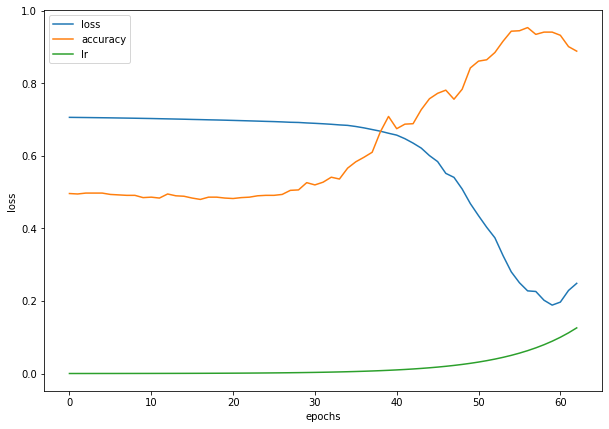

In [42]:
pd.DataFrame(h9.history).plot(figsize=(10, 7), xlabel="epochs", ylabel="loss")

In [43]:
## Plot the figure (learning rate v/s the Loss)

lrs = 1e-4 * 10**(tf.range(63)/20)
lrs

<tf.Tensor: shape=(63,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.46683

In [44]:
loss_values = h9.history["loss"]
len(loss_values)

63

Text(0.5, 1.0, 'Learning rate vs. Loss')

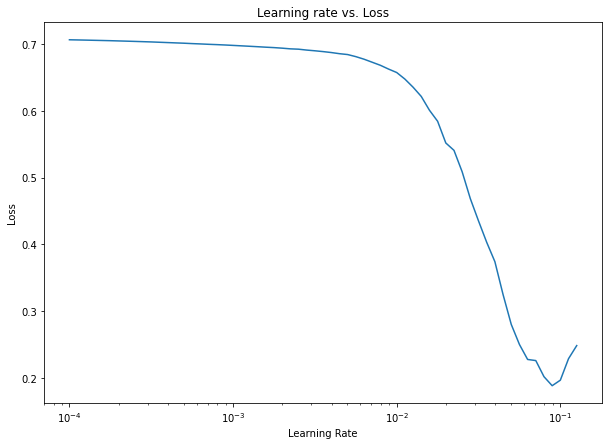

In [45]:
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, h9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

## Obseravation
* If we see the above plots, and by using the callbacks 
* The ideal learning rate is in between 0.001 and 0.01, Hence if we start model's learning rate in between these values, we might acheive the results within less training time

In [46]:
## setting the random seed
tf.random.set_seed(42)

## 1. Create a model
m10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, tf.keras.activations.relu),
    tf.keras.layers.Dense(1, tf.keras.activations.sigmoid)
])

m10.compile(loss = tf.keras.losses.BinaryCrossentropy(),
           optimizer = tf.keras.optimizers.Adam(0.005),
           metrics = ["accuracy"])
callback_10 = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=3)
lr10_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-2 * 10 **(epoch/20))

h10 = m10.fit(X_train, y_train, epochs=100, verbose=0, callbacks = [lr10_scheduler, callback_10])

In [47]:
len(h10.history)

3

<AxesSubplot:xlabel='epocs', ylabel='loss'>

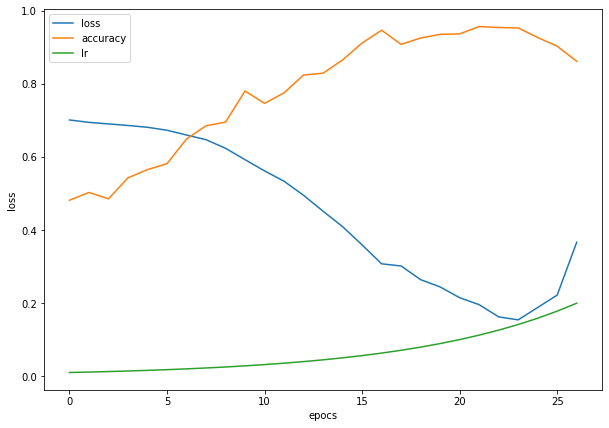

In [48]:
pd.DataFrame(h10.history).plot(figsize=(10,7), xlabel="epocs", ylabel="loss", title="")

In [49]:
m10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2163 - accuracy: 0.8950


[0.21629925072193146, 0.8949999809265137]

Doing binary classification
Doing binary classification


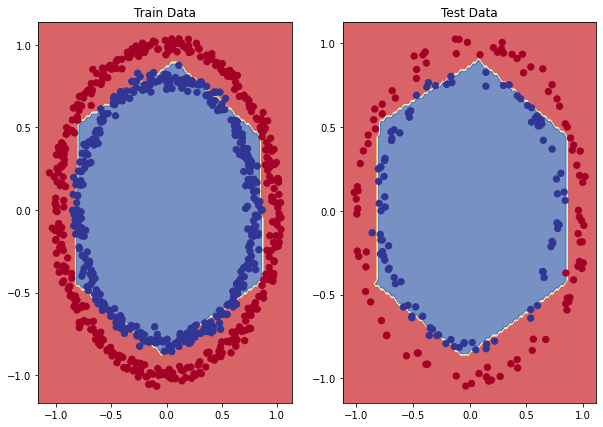

In [50]:
plt.figure(figsize=(10, 7))
plt.subplot(1,2,1) # Row 1, 2nd Column, 1st Plot
plt.title("Train Data")
plot_decision_boundary(model = m10, X = X_train,y = y_train)
plt.subplot(1,2,2) # Row 2, 2nd Column, 2nd Plot
plt.title("Test Data")
plot_decision_boundary(model = m10, X = X_test, y = y_test)
plt.show()

In [51]:
loss, accuracy = m10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.2163 - accuracy: 0.8950
Model loss on the test set: 0.21629925072193146
Model accuracy on the test set: 89.50%


## Classification evaluation methods
* **Metric Name : When to use**
* Accuracy: Default metric for classification problems, Not best for Imbalanced classes( Ex, n(C1) =1000, n(C2) = 50.
* Precision : Higher precision leads to less false positives.
* Recall : Higher recall leads to less false negatives.
* F1-score : Combination of precision and recall, usually a good overall metric for a classification model
* Confusion matrix : When comparing prediction to truth labels, to see where model gets confused, Can be hard to use with large numbers of classes.
* Classification report (from scikit-learn)

## Confusion Matrix

In [52]:
from sklearn.metrics import confusion_matrix

# Predictions
y_pred = m10.predict(X_test)

# Confusion matrix

#confusion_matrix(y_test, y_pred) This gives error because the y_pred has continuous values instead of binary.

# Convert prediction probabilities to binary format and view the first 10
tf.round(y_pred)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [53]:
# Confusion matrix
confusion_matrix(y_test, tf.round(y_pred))

array([[100,   1],
       [ 20,  79]])

## Making confusion matrix printing better

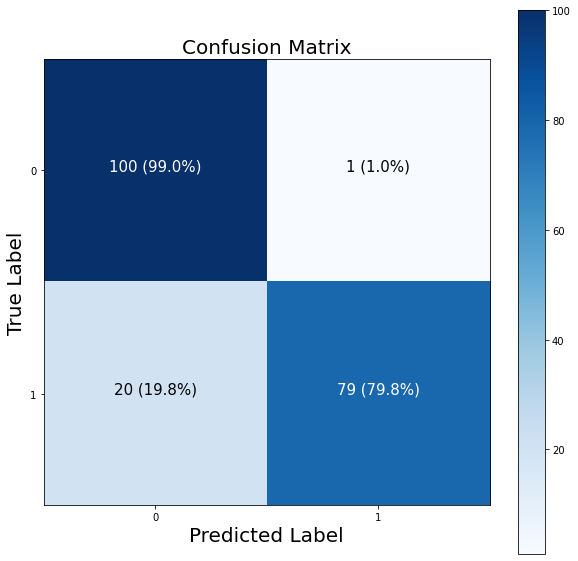

In [54]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_pred))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:np.newaxis] # Normalize
n_classes = cm.shape[0]
#print(cm)
#print(cm_norm)

# Prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False
if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

# Labelling the axes
ax.set(title="Confusion Matrix",
      xlabel="Predicted Label",
      ylabel="True Label",
      xticks=np.arange(n_classes),
      yticks=np.arange(n_classes),
      xticklabels=labels,
      yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)


# set threshold for different colors
threshold = (cm.max() + cm.min())/2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j] > threshold else "black",
            size = 15)

## Creating a function for plotting confusion_matrix

In [55]:
def plot_confusion_matrix(y_test, y_pred):
    figsize = (10, 10)

    # Create the confusion matrix
    cm = confusion_matrix(y_test, tf.round(y_pred))
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:np.newaxis] # Normalize
    n_classes = cm.shape[0]
    #print(cm)
    #print(cm_norm)

    # Prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Create classes
    classes = False
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Labelling the axes
    ax.set(title="Confusion Matrix",
          xlabel="Predicted Label",
          ylabel="True Label",
          xticks=np.arange(n_classes),
          yticks=np.arange(n_classes),
          xticklabels=labels,
          yticklabels=labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(20)
    ax.xaxis.label.set_size(20)
    ax.title.set_size(20)


    # set threshold for different colors
    threshold = (cm.max() + cm.min())/2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i,j] > threshold else "black",
                size = 15)

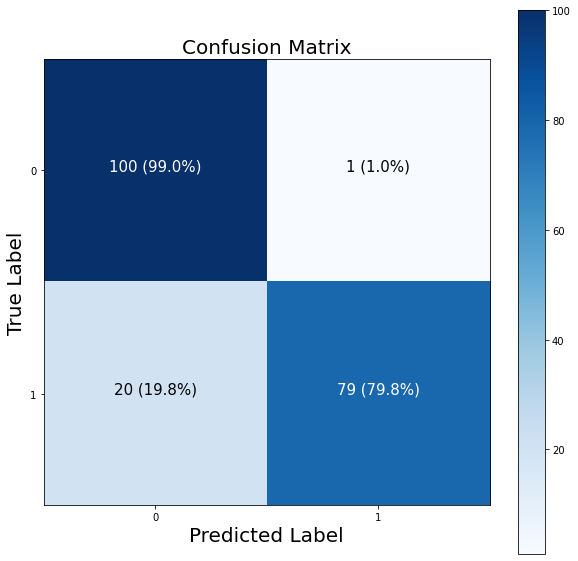

In [56]:
plot_confusion_matrix(y_test = y_test, y_pred = y_pred)

## Multi-class Classification
* When we have more than 2 classes as an option, it's known as **multi-class classification**.
* Pracitce for Multi-class classification, Build a Neural Network to classify images of different items of clothing from fashion_MNIST dataset

In [57]:
# Creating a Multi-class classification

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted intro training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [58]:
# print(train_data[0])
# print(train_labels[0])
# print(test_data[0])
# print(test_labels[0])

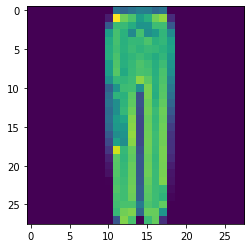

In [59]:
# Plotting a singel sample against 
import matplotlib.pyplot as plt
plt.imshow(train_data[1000])

In [60]:
class_names = ["T-shirt'/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", " Bag", "Ankle boot"]

Text(0.5, 1.0, 'Pullover')

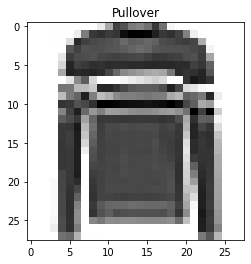

In [61]:
import matplotlib.pyplot as plt
index_of_choice = 5
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

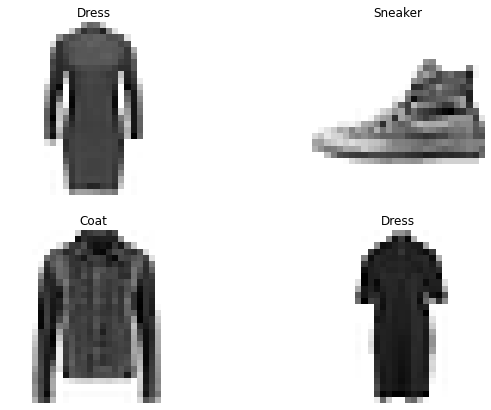

In [62]:
import random
plt.figure(figsize=(10,7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Building a multi-class classification model
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class for clothing)
* Loss function = tf.keras.losses.CategoricalCrossEntropy()
* Output layer activation = Softmax(not sigmoid)

In [63]:
# Out data (needs)/(which is feeded) to be falttened.
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape
# 28 * 28 = 784

(None, 784)

In [64]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [65]:
# set the random seed
tf.random.set_seed(42)

## 1. Create a model
m11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

## Loss: CategoricalCrossEntropy is used when the data is one-hot encoded(Labels)
## Loss: SparseCategoricalCrossEntropy is used when we have integers Labels.
m11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
            optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
            metrics = ["accuracy"])

mc_h11 = m11.fit(train_data, train_labels, epochs=30, validation_data=(test_data, test_labels))

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2685 - accuracy: 0.1521 - val_loss: 2.1246 - val_accuracy: 0.2010
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 2.0579 - accuracy: 0.2013 - val_loss: 2.0747 - val_accuracy: 0.1913
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 1.9883 - accuracy: 0.2256 - val_loss: 1.9206 - val_accuracy: 0.2383
Epoch 4/30
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6988 - accuracy: 0.3058 - val_loss: 1.6129 - val_accuracy: 0.3218
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5780 - accuracy: 0.3424 - val_loss: 1.5485 - val_accuracy: 0.3603
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5379 - accuracy: 0.3548 - val_loss: 1.5408 - val_accuracy: 0.3667
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5095 - accuracy: 0.3612 - val_loss: 1.5004 - val_accuracy:

In [66]:
m11.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                50        
Total params: 3,190
Trainable params: 3,190
Non-trainable params: 0
_________________________________________________________________


## Scaling the Data / Normalization
Neural Networks prefer data to be scaled, The tensors like to have numbers between 0-1.

In [67]:
train_data.min(), train_data.max()

(0, 255)

In [68]:
## Normaizing the data
train_data_norm = train_data / 255.0
test_data_norm  = test_data / 255.0 

In [69]:
train_data_norm.max(), test_data_norm.max()

(1.0, 1.0)

In [70]:
# Now that data is normalized, Building a model to find patterns

# set the random seed
tf.random.set_seed(42)

# 1. Create a model
m12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

m12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
           optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
           metrics = ["accuracy"])

m12_h = m12.fit(train_data_norm , train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0987 - accuracy: 0.5718 - val_loss: 0.9617 - val_accuracy: 0.6553
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8661 - accuracy: 0.6932 - val_loss: 0.8452 - val_accuracy: 0.7093
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8399 - accuracy: 0.7001 - val_loss: 0.8149 - val_accuracy: 0.7089
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8276 - accuracy: 0.7054 - val_loss: 0.8251 - val_accuracy: 0.7037
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8201 - accuracy: 0.7060 - val_loss: 0.9053 - val_accuracy: 0.6706
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8157 - accuracy: 0.7085 - val_loss: 0.8032 - val_accuracy: 0.7090
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8051 - accuracy: 0.7094 - val_loss: 0.9451 - val_accuracy:

<AxesSubplot:title={'center':'With Normalization'}, xlabel='epocs', ylabel='loss'>

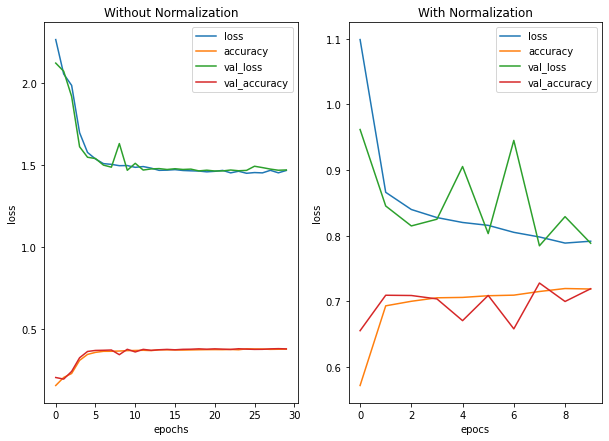

In [71]:
import matplotlib.pyplot as plt

pd.DataFrame(mc_h11.history).plot(figsize=(10,7), xlabel="epochs", ylabel="loss", title="Without Normalization", ax=plt.subplot(1,2,1))
pd.DataFrame(m12_h.history).plot(figsize=(10,7), xlabel="epocs", ylabel="loss", title="With Normalization", ax = plt.subplot(1,2,2))

## Finding the Ideal learning rate

In [72]:
## Setting the Random seed
tf.random.set_seed(42)

## 1. Create a Model
m13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

lr_m13_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 *10**(epoch/20))

m13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
           optimizer = tf.keras.optimizers.Adam(),
           metrics=["accuracy"])

m13_h = m13.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels), callbacks=[lr_m13_scheduler])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

Text(0.5, 1.0, 'Finding the Ideal learning rate')

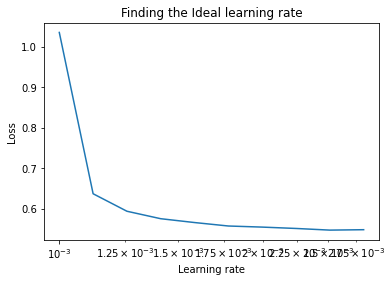

In [73]:
## Plot the learning rate decay
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(10)/20))
plt.semilogx(lrs, m13_h.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the Ideal learning rate")

In [74]:
## Creating the model with ideal learning rate (lr = 0.001)

## Setting the Random seed
tf.random.set_seed(42)

## 1. Create a Model
m14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])


m14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
           optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
           metrics=["accuracy"])

m14_h = m14.fit(train_data_norm, train_labels, epochs=20, validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

## Evaluating our Multi-class classification model
* Evaluating performance using other classification metrics (confusion matrix).
* Improve the results (by training longer/changing the architecure).
* Save and import it for use in an application.

In [75]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    figsize = (10, 10)

    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:np.newaxis] # Normalize
    n_classes = cm.shape[0]
    #print(cm)
    #print(cm_norm)

    # Prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Create classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Labelling the axes
    ax.set(title="Confusion Matrix",
          xlabel="Predicted Label",
          ylabel="True Label",
          xticks=np.arange(n_classes),
          yticks=np.arange(n_classes),
          xticklabels=labels,
          yticklabels=labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)


    # set threshold for different colors
    threshold = (cm.max() + cm.min())/2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i,j] > threshold else "black",
                size = text_size)

In [76]:
class_names

["T-shirt'/top",
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 ' Bag',
 'Ankle boot']

In [77]:
y_probs = m14.predict(test_data_norm) #probs ~ prediction probabilities

In [78]:
y_probs[:5]

array([[8.56298574e-11, 3.53613812e-13, 2.66336938e-05, 4.63560532e-08,
        5.09496931e-05, 9.61188376e-02, 8.17779338e-08, 9.18688104e-02,
        4.06051241e-03, 8.07874084e-01],
       [3.42785825e-06, 1.28992133e-16, 9.59891379e-01, 2.05161555e-07,
        1.53292445e-02, 2.45320528e-13, 2.41428986e-02, 1.13836206e-28,
        6.32718031e-04, 4.47892958e-08],
       [6.10630595e-05, 9.96576726e-01, 4.38669758e-08, 3.34058981e-03,
        1.32494733e-05, 1.43832158e-21, 8.27905296e-06, 7.32369005e-18,
        5.48114976e-08, 4.92247675e-14],
       [7.50309991e-05, 9.90536869e-01, 4.25282479e-07, 9.22315102e-03,
        1.36230781e-04, 1.82760903e-18, 2.68080639e-05, 4.81247359e-14,
        1.45214926e-06, 2.22112901e-11],
       [7.21899420e-02, 1.54957706e-06, 2.55668879e-01, 1.03631122e-02,
        4.35413569e-02, 1.10691567e-13, 6.16930306e-01, 6.75428829e-23,
        1.30491401e-03, 1.21402455e-09]], dtype=float32)

In [79]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([8.5629857e-11, 3.5361381e-13, 2.6633694e-05, 4.6356053e-08,
        5.0949693e-05, 9.6118838e-02, 8.1777934e-08, 9.1868810e-02,
        4.0605124e-03, 8.0787408e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [80]:
## Converting all the prediction probabilities 
y_preds = y_probs.argmax(axis=1)
y_preds

array([9, 2, 1, ..., 3, 1, 5])

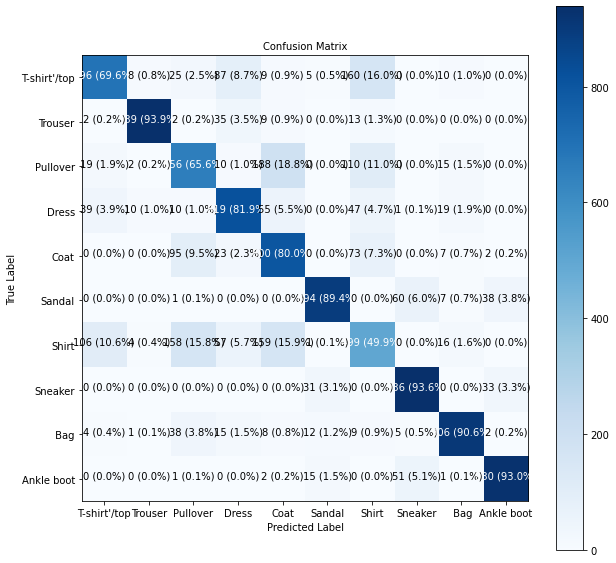

In [81]:
make_confusion_matrix(y_true=test_labels, y_pred= y_preds, classes = class_names, figsize=(15,15), text_size=10)

In [82]:
# A fucntion to pick and plot a prediction

import random

def plot_random_image(model, images, true_labels, classes):
    """
    Picks a random image, plot it and labels it with a prediction and truth label
    """
    
    # random number
    i = random.randint(0, len(images))
    
    # Create predicitons and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]
    
    # Plot the images
    plt.imshow(target_image, cmap=plt.cm.binary)
    
    # Correct = Red, wrong = Green
    
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"
        
    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
              color = color)

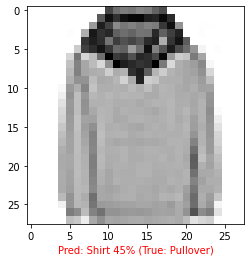

In [93]:
#prediction
plot_random_image(model=m14, images=test_data_norm, true_labels=test_labels, classes =class_names)

### What are the patterns is our model is learning

In [94]:
m14.layers

In [97]:
# Extract the layer and get patterns of that layer in our network

m14.layers[1]

weights, biasses = m14.layers[1].get_weights()

weights, weights.shape

(array([[ 0.7150264 , -0.06077084, -0.9976308 , -1.048431  ],
        [ 0.2773213 , -0.4715537 , -0.5291644 ,  0.02329264],
        [ 0.77524304,  0.5402762 , -1.1288569 , -0.7426153 ],
        ...,
        [-0.39453414,  0.4762867 , -0.22641544,  0.2550595 ],
        [-0.4051576 ,  0.61810035,  0.23928434, -0.5038761 ],
        [ 0.23884575,  0.11606917, -0.12131323,  0.0435242 ]],
       dtype=float32),
 (784, 4))

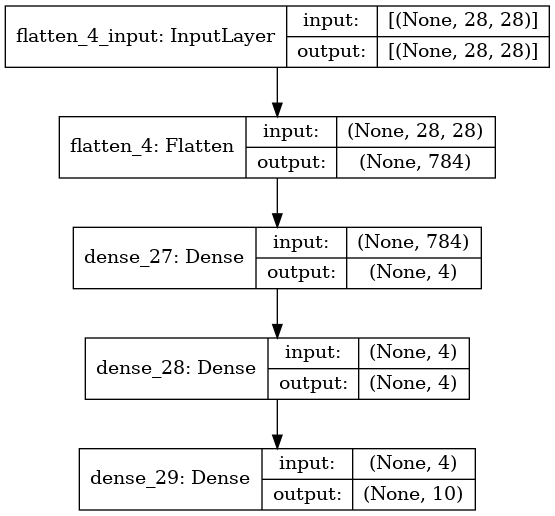

In [98]:
from tensorflow.keras.utils import plot_model

plot_model(m14, show_shapes=True)